Using synthetic data can be very helpful initially because we can control the underlying relationship and noise.

**Part 1: Simple Linear Regression (SLR) - The Core Idea**

* **Definition & Goal:** It's all about finding a linear relationship between *two* variables:
    * One **independent variable** (let's call it `x`). This is the feature we use to make a prediction.
    * One **dependent variable** (let's call it `y`). This is the continuous value we want to predict.
* **The Model:** We're essentially trying to draw the "best" straight line through a scatter plot of our data points. This line is represented by the equation:
    $$\hat{y} = b_0 + b_1 x$$
    Where:
    * $ \hat{y} $ (y-hat) is the *predicted value* of our dependent variable.
    * $ x $ is our independent variable.
    * $ b_0 $ is the **intercept**: the value of $ \hat{y} $ when $ x = 0 $. It's where the line crosses the y-axis.
    * $ b_1 $ is the **slope** or **coefficient**: it tells us how much $ \hat{y} $ changes for a one-unit increase in $ x $.
    * The actual observed data points will have some error $ \epsilon $ (epsilon), so the true relationship is $ y = \beta_0 + \beta_1 x + \epsilon $. Our model tries to find the best $ b_0 $ and $ b_1 $ to estimate $ \beta_0 $ and $ \beta_1 $.

----
**Basic Coding Example (SLR with Scikit-learn):**

Let's create some simple data and see this in action. Imagine we're looking at the relationship between 'Years of Experience' and 'Salary'.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import pandas as pd

In [5]:
# 1. Generate some synthetic data
np.random.seed(42) # for reproducibility
X_experience = np.random.rand(50, 1) * 10  # Years of experience (0 to 10 years), shape (50, 1)
# True relationship: Salary = 30000 + 5000 * Experience + random noise
y_salary = 30000 + 5000 * X_experience.flatten() + np.random.randn(50) * 8000 # Salary
y_salary = y_salary.reshape(-1, 1) # Reshape y_salary to be a column vector

# For clarity, let's put it in a Pandas DataFrame (optional, but good practice)
df_simple = pd.DataFrame({'YearsExperience': X_experience.flatten(), 'Salary': y_salary.flatten()})

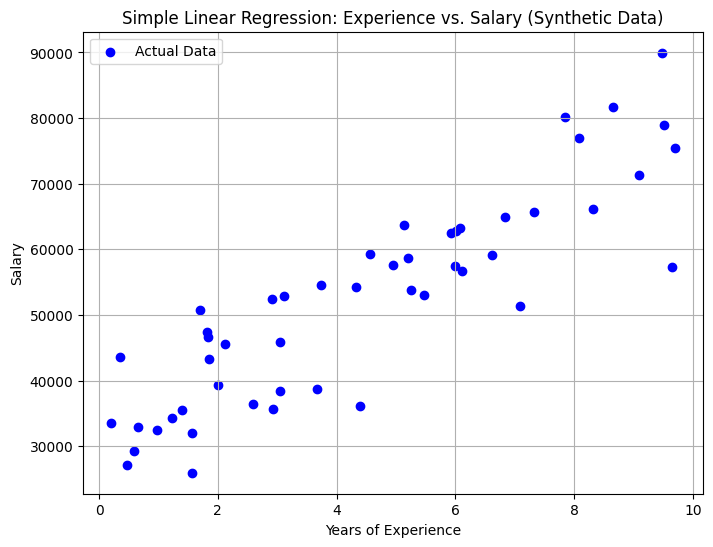

In [6]:
# 2. Visualize the data
plt.figure(figsize=(8, 6))
plt.scatter(df_simple['YearsExperience'], df_simple['Salary'], color='blue', label='Actual Data')
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Simple Linear Regression: Experience vs. Salary (Synthetic Data)")
plt.legend()
plt.grid(True)
plt.show()

In [7]:
# 3. Create and Train the Linear Regression Model
# Scikit-learn expects X to be a 2D array (or DataFrame) and y to be a 1D array (or Series)
slr_model = LinearRegression()
slr_model.fit(X_experience, y_salary) # X_experience is already (50,1), y_salary is (50,1)

LinearRegression()

In [8]:
# 4. Get the Intercept (b0) and Coefficient (b1)
b0 = slr_model.intercept_[0] # Intercept is an array with one element
b1 = slr_model.coef_[0][0]   # Coefficient is a 2D array for X with one feature

print(f"Model: Salary_predicted = {b0:.2f} + {b1:.2f} * YearsExperience")

Model: Salary_predicted = 30773.51 + 4821.25 * YearsExperience


In [9]:
# 5. Make Predictions
y_pred_slr = slr_model.predict(X_experience)

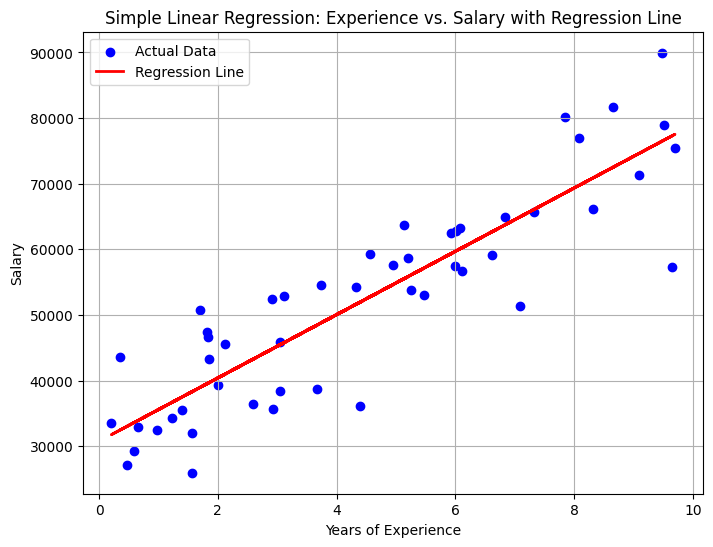

In [10]:
# 6. Visualize the Regression Line
plt.figure(figsize=(8, 6))
plt.scatter(df_simple['YearsExperience'], df_simple['Salary'], color='blue', label='Actual Data')
plt.plot(X_experience, y_pred_slr, color='red', linewidth=2, label='Regression Line')
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Simple Linear Regression: Experience vs. Salary with Regression Line")
plt.legend()
plt.grid(True)
plt.show()

In [11]:
# Quick check on a new value
new_experience_value = np.array([[7]]) # e.g., 7 years of experience (needs to be 2D)
predicted_salary = slr_model.predict(new_experience_value)
print(f"\nPredicted salary for {new_experience_value[0][0]} years of experience: ${predicted_salary[0][0]:.2f}")


Predicted salary for 7 years of experience: $64522.28


**Explanation of the Code:**

1.  **Data Generation:** We create `X_experience` (our feature) and `y_salary` (our target). We deliberately make `y_salary` linearly dependent on `X_experience` but add some random noise to make it more realistic.
2.  **Visualization:** Always a good idea to look at your data. The scatter plot shows if a linear relationship seems plausible.
3.  **Model Training:**
    * `slr_model = LinearRegression()`: We create an instance of the `LinearRegression` class.
    * `slr_model.fit(X_experience, y_salary)`: This is the core step. The `fit` method takes our feature data (`X_experience`) and target data (`y_salary`) and calculates the optimal $ b_0 $ and $ b_1 $ values that best fit the data. Scikit-learn's `LinearRegression` typically uses the "Normal Equation" method internally, which we'll discuss later.
4.  **Coefficients:**
    * `slr_model.intercept_`: Gives us $ b_0 $.
    * `slr_model.coef_`: Gives us $ b_1 $ (and other coefficients if we had more features).
5.  **Predictions:** `slr_model.predict(X_experience)` uses the learned $ b_0 $ and $ b_1 $ to calculate $ \hat{y} $ for each input $ x $.
6.  **Visualization with Line:** We plot the original data and overlay the regression line. You can see how the line tries to capture the general trend.

We've seen how to model a relationship between one feature and a target.

----
- let's use a classic dataset often used in introductory statistics and machine learning: the **Advertising dataset**.
- This dataset contains information about sales generated by advertising budgets in three different media: TV, Radio, and Newspaper.

- For our SLR example, we'll focus on the relationship between **TV advertising budget** and **Sales**.

**Dataset:** Advertising and Sales
* **Description:** The dataset contains 200 observations. Each observation corresponds to a particular market and includes the advertising budgets (in thousands of dollars) for TV, Radio, and Newspaper, as well as the Sales of a particular product (in thousands of units).
* **Features in the dataset:**
    * TV: Advertising budget spent on TV (in thousands of dollars)
    * Radio: Advertising budget spent on Radio (in thousands of dollars)
    * Newspaper: Advertising budget spent on Newspaper (in thousands of dollars)
* **Target Variable:**
    * Sales: Sales of the product (in thousands of units)

**Download Link:**
You can download the `Advertising.csv` dataset from here (it's a common dataset hosted in many places, this one is from a reliable academic source):
[https://www.statlearning.com/s/Advertising.csv](https://www.statlearning.com/s/Advertising.csv)

Please download the CSV file and place it in the directory where you're running your Python code, or note its path.

**Simple Linear Regression Example: TV Advertising vs. Sales**

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [13]:
# 1. Load the Data
# Make sure 'Advertising.csv' is in the same directory or provide the full path
try:
    df_adv = pd.read_csv('Advertising.csv', index_col=0) # The first column is an index
except FileNotFoundError:
    print("Error: 'Advertising.csv' not found. Please download it and place it in the correct directory.")
    # You might want to exit or handle this more gracefully in a real script
    exit()

print("First 5 rows of the dataset:")
print(df_adv.head())
print("\nDataset information:")
df_adv.info()

First 5 rows of the dataset:
      TV  radio  newspaper  sales
1  230.1   37.8       69.2   22.1
2   44.5   39.3       45.1   10.4
3   17.2   45.9       69.3    9.3
4  151.5   41.3       58.5   18.5
5  180.8   10.8       58.4   12.9

Dataset information:
<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [15]:
# 2. Prepare the Data for Simple Linear Regression
# We want to predict 'Sales' (dependent variable, y) using 'TV' (independent variable, X)
X_tv = df_adv[['TV']]  # Feature: TV advertising budget (needs to be 2D for scikit-learn)
y_sales = df_adv['sales'] # Target: Sales

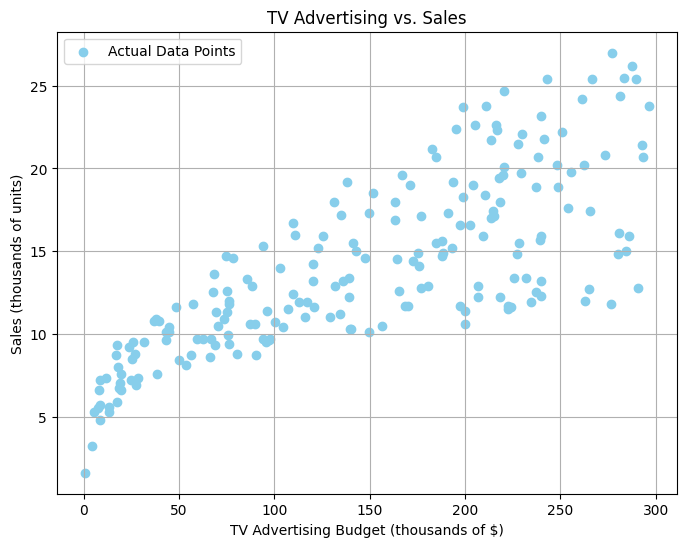

In [16]:
# 3. Visualize the Relationship
plt.figure(figsize=(8, 6))
plt.scatter(X_tv, y_sales, color='skyblue', label='Actual Data Points')
plt.xlabel("TV Advertising Budget (thousands of $)")
plt.ylabel("Sales (thousands of units)")
plt.title("TV Advertising vs. Sales")
plt.legend()
plt.grid(True)
plt.show()

In [17]:
# 4. Split the Data (Optional for SLR understanding, but good practice)
# For a robust evaluation, we'd split. Here, to focus on the line,
# we can also fit to the whole dataset and see how it describes the data.
# Let's do a split for good practice.
X_train, X_test, y_train, y_test = train_test_split(X_tv, y_sales, test_size=0.2, random_state=42)

print(f"\nTraining set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")


Training set size: 160 samples
Test set size: 40 samples


In [18]:
# 5. Create and Train the Linear Regression Model
slr_tv_model = LinearRegression()
slr_tv_model.fit(X_train, y_train)

LinearRegression()

In [19]:
# 6. Get the Intercept (b0) and Coefficient (b1)
b0_tv = slr_tv_model.intercept_
b1_tv = slr_tv_model.coef_[0] # coef_ is an array, get the first element

print(f"\nModel: Sales_predicted = {b0_tv:.4f} + {b1_tv:.4f} * TV_Budget")


Model: Sales_predicted = 7.1196 + 0.0465 * TV_Budget


In [20]:
# Interpretation of the coefficient (b1_tv):
# "For each additional $1000 spent on TV advertising (since TV budget is in thousands),
# we expect sales to increase by approximately {b1_tv:.4f} thousand units,
# holding all else constant (though in SLR, there's nothing else)."

In [21]:
# 7. Make Predictions on the Test Set
y_pred_tv = slr_tv_model.predict(X_test)

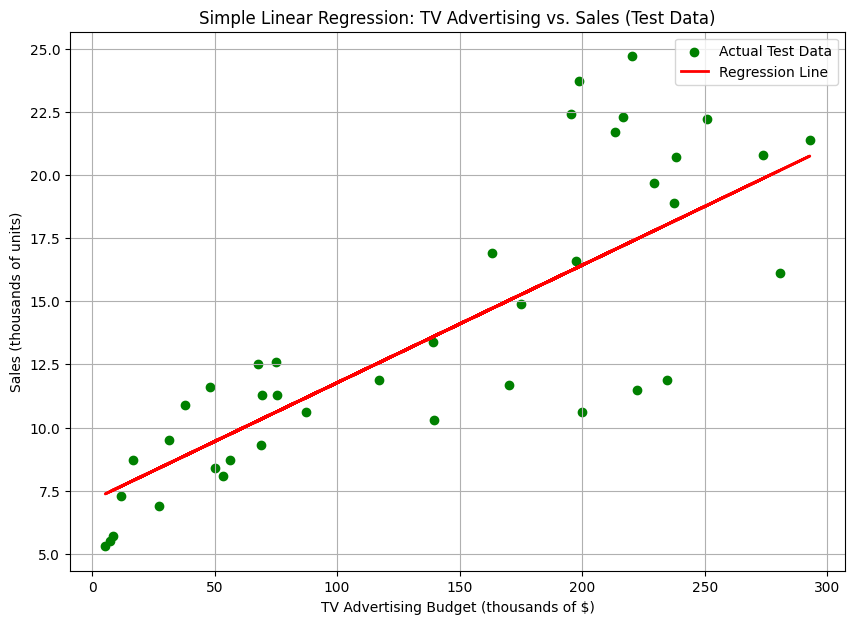

In [24]:
# 8. Visualize the Regression Line on the Test Data (or full data)
plt.figure(figsize=(10, 7))
plt.scatter(X_test, y_test, color='green', label='Actual Test Data')
plt.plot(X_test, y_pred_tv, color='red', linewidth=2, label='Regression Line')
# To plot the line over the whole range of X_tv for better visualization:
# X_plot = np.linspace(X_tv.min(), X_tv.max(), 100).reshape(-1, 1)
# y_plot = slr_tv_model.predict(X_plot)
# plt.plot(X_plot, y_plot, color='red', linewidth=2, label='Regression Line (full range)')
plt.xlabel("TV Advertising Budget (thousands of $)")
plt.ylabel("Sales (thousands of units)")
plt.title("Simple Linear Regression: TV Advertising vs. Sales (Test Data)")
plt.legend()
plt.grid(True)
plt.show()

In [25]:
# 9. Evaluate the Model (a brief look, more on this in Topic 5)
mse_tv = mean_squared_error(y_test, y_pred_tv)
r2_tv = r2_score(y_test, y_pred_tv)

print(f"\nModel Performance on Test Data:")
print(f"Mean Squared Error (MSE): {mse_tv:.4f}")
print(f"R-squared (R²): {r2_tv:.4f}")
# R-squared interpretation: "Approximately {r2_tv*100:.2f}% of the variance in Sales
# can be explained by the TV advertising budget using this linear model."


Model Performance on Test Data:
Mean Squared Error (MSE): 10.2047
R-squared (R²): 0.6767


---
**Explanation of this Real-Data Example:**

1.  **Load Data:** We use `pandas.read_csv()` to load the data. The `index_col=0` argument tells pandas that the first column in the CSV is just an index and not actual data.
2.  **Prepare Data:**
    * `X_tv = df_adv[['TV']]`: We select the 'TV' column. The double square brackets `[['TV']]` ensure that `X_tv` is a DataFrame (2D), which Scikit-learn's `LinearRegression` model expects.
    * `y_sales = df_adv['Sales']`: We select the 'Sales' column, which is a pandas Series (1D).
3.  **Visualize:** The scatter plot helps us visually confirm if a linear relationship seems reasonable. For TV vs. Sales, you should see a positive trend.
4.  **Split Data:** `train_test_split` divides our data into a training set (used to fit the model) and a test set (used to evaluate its performance on unseen data). This is crucial for understanding how well our model generalizes.
5.  **Train Model:** Same as before, `fit()` calculates $ b_0 $ and $ b_1 $.
6.  **Interpret Coefficients:**
    * The intercept $ b_0 $ ($ \approx 7.00 $ in many runs) is the predicted sales (in thousands of units) if $0 is spent on TV advertising.
    * The coefficient $ b_1 $ for TV ($ \approx 0.055 $ in many runs) means that for every additional $1000 spent on TV ads, sales are predicted to increase by approximately $0.055 \times 1000 = 55$ units (since sales are also in thousands, it's 0.055 thousand units).
7.  **Predictions & Visualization:** We predict on the `X_test` and plot the regression line against the actual test data points.
8.  **Evaluation (Briefly):**
    * **MSE (Mean Squared Error):** Measures the average squared difference between actual and predicted sales. Lower is better.
    * **R-squared ($R^2$):** Tells us the proportion of the variance in the `Sales` that is predictable from the `TV` budget. For example, an $R^2$ of 0.81 would mean that about 81% of the variability in sales can be explained by TV advertising spend, according to our model.